In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Hackathon_Ideal_Data.csv")
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [ ]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

In [ ]:
df.isnull().sum()

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [ ]:
df.shape

(14260, 10)

In [ ]:
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [ ]:
df.nunique()

MONTH           3
STORECODE      10
QTY           258
VALUE        1606
GRP            80
SGRP          177
SSGRP         242
CMP           512
MBRD          818
BRD          1613
dtype: int64

CORRELATION HEAPMAP

<ipython-input-29-eba16d08aaa2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


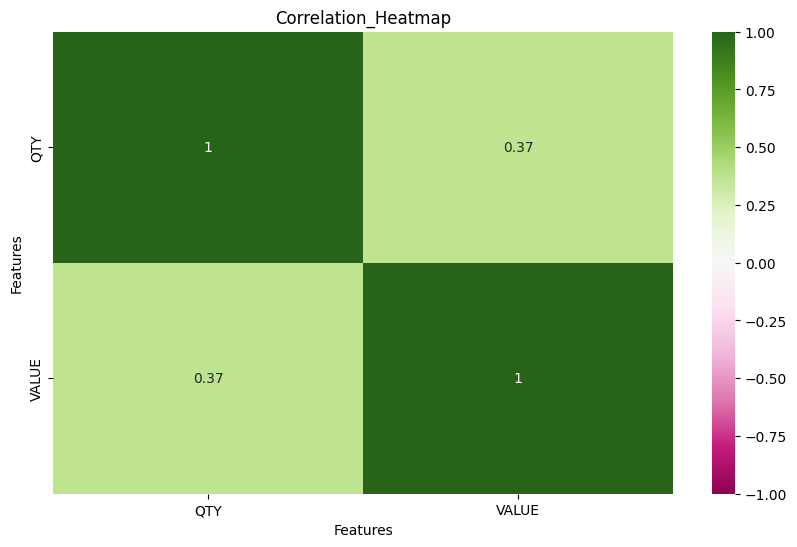

In [ ]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix,vmin=-1, vmax=1, annot=True,  cmap='PiYG')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation_Heatmap')
plt.show()

SALES ANALYSIS

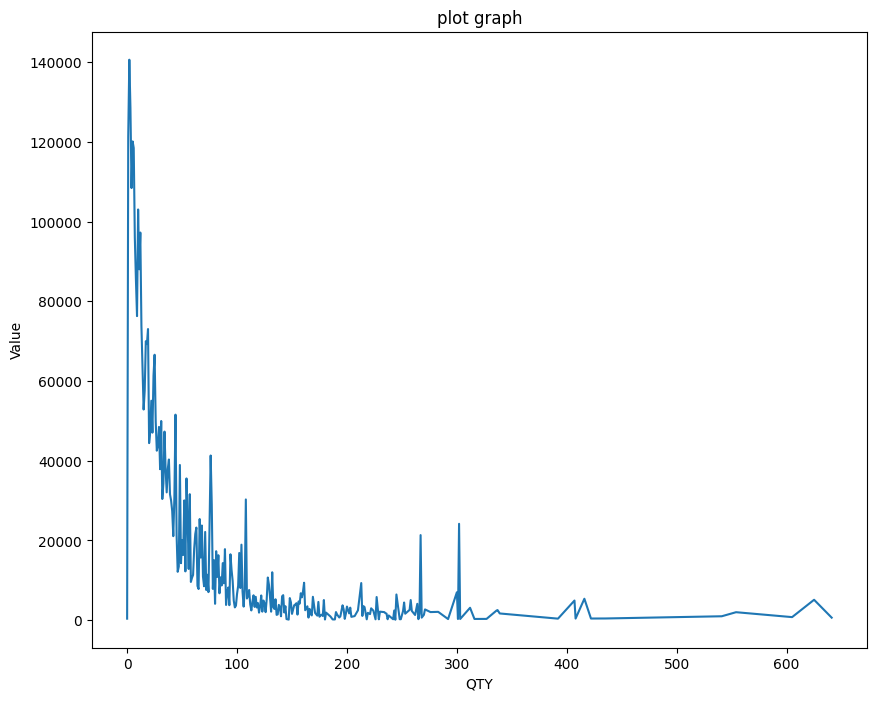

In [ ]:
total_sales=df.groupby("QTY")["VALUE"].sum()
plt.figure(figsize=(10,8))
plt.plot(total_sales.index, total_sales.values)
plt.xlabel("QTY")
plt.ylabel("Value")
plt.title("plot graph")
plt.xticks(rotation=0)
plt.show()


MONTHLY ANALYSIS OF SALES

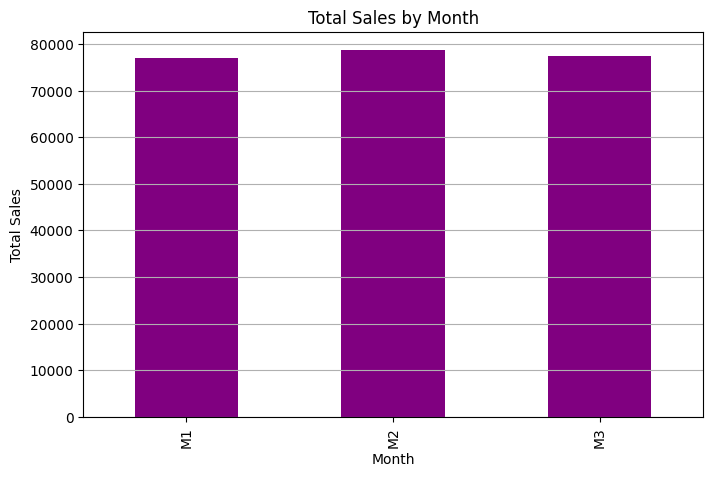

In [ ]:
months = df.groupby("MONTH")["QTY"].sum()
plt.figure(figsize=(8, 5))
months.plot(kind="bar", color="purple")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.grid(axis="y")
plt.show()

TOP SELLING BRANDS

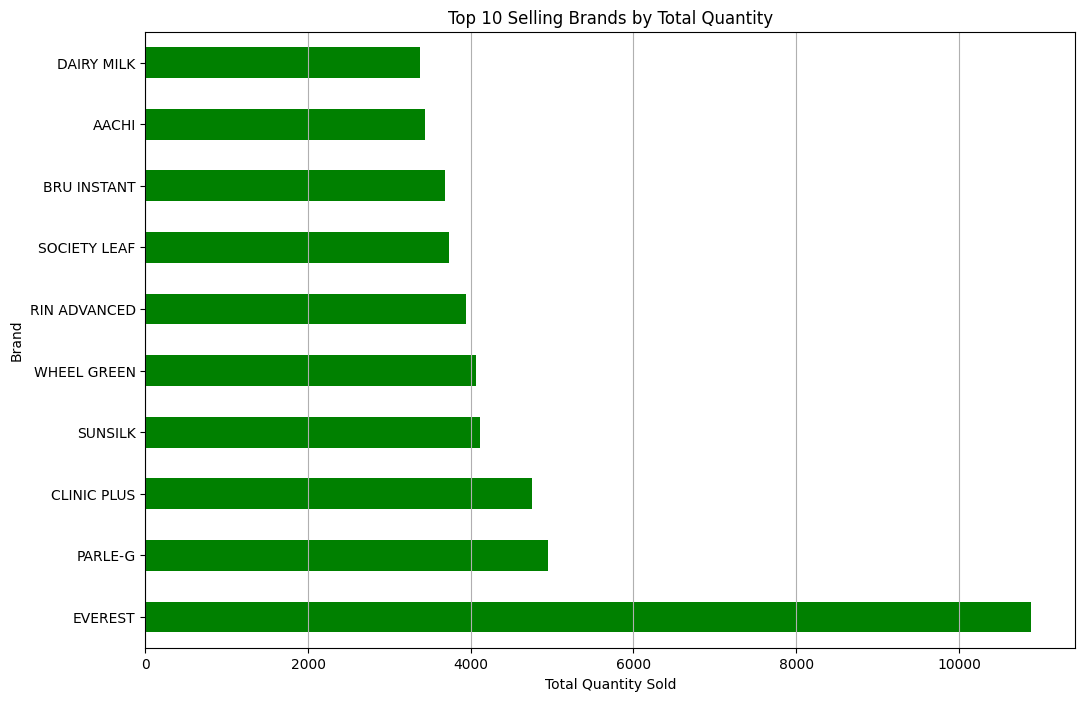

In [ ]:
top_selling_brands = df.groupby("BRD")["QTY"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_selling_brands.plot(kind="barh", color="green")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Brand")
plt.title("Top 10 Selling Brands by Total Quantity")
plt.grid(axis="x")
plt.show()

TOP THREE STORES

In [ ]:
total_revenue_per_store = df.groupby("STORECODE")["QTY"].sum()
top_3_stores = total_revenue_per_store.sort_values(ascending=False).head(3)
print("Top 3 Stores by Total Revenue:")
for store_code, revenue in top_3_stores.items():
    print(f"- Store Code: {store_code}, Total Revenue: ₹{revenue:.2f}")

Top 3 Stores by Total Revenue:
- Store Code: P4, Total Revenue: ₹34089.00
- Store Code: P8, Total Revenue: ₹32003.00
- Store Code: P3, Total Revenue: ₹27602.00


TOP SALES IN GRP AND SGRP

In [ ]:
top_selling_grp = df.groupby('GRP')['QTY'].sum().sort_values(ascending=False).head(1)
top_grp_code = top_selling_grp.index[0]
top_selling_sgrp = df[df['GRP'] == top_grp_code].groupby('SGRP')['QTY'].sum().sort_values(ascending=False).head(1)
top_selling_cmp = df.groupby('CMP')['QTY'].sum().sort_values(ascending=False).head(3)
top_selling_mbrd = df.groupby('MBRD')['QTY'].sum().sort_values(ascending=False).head(3)
top_selling_brd = df.groupby('BRD')['QTY'].sum().sort_values(ascending=False).head(3)
print("Top Selling:")
print(f"- Group (GRP): {top_selling_grp.index[0]} - Total Quantity Sold: {top_selling_grp.values[0]:.0f}")
print(f"- Subgroup (SGRP) within Group {top_grp_code}: {top_selling_sgrp.index[0]} - Total Quantity Sold: {top_selling_sgrp.values[0]:.0f}")
print(f"- Company (CMP): {top_selling_cmp.index[0]} - Total Quantity Sold: {top_selling_cmp.values[0]:.0f}")
print(f"- Brand (MBRD): {top_selling_mbrd.index[0]} - Total Quantity Sold: {top_selling_mbrd.values[0]:.0f}")
print(f"- Brand (BRD): {top_selling_brd.index[0]} - Total Quantity Sold: {top_selling_brd.values[0]:.0f}")

Top Selling:
- Group (GRP): BISCUITS - CORE & NON CORE - Total Quantity Sold: 35375
- Subgroup (SGRP) within Group BISCUITS - CORE & NON CORE: SWEET/COOKIES - Total Quantity Sold: 9097
- Company (CMP): HINDUSTAN UNILEVER LIMITED - Total Quantity Sold: 46584
- Brand (MBRD): EVEREST - Total Quantity Sold: 11528
- Brand (BRD): EVEREST - Total Quantity Sold: 10888


STOREWISE COMPANY SALES

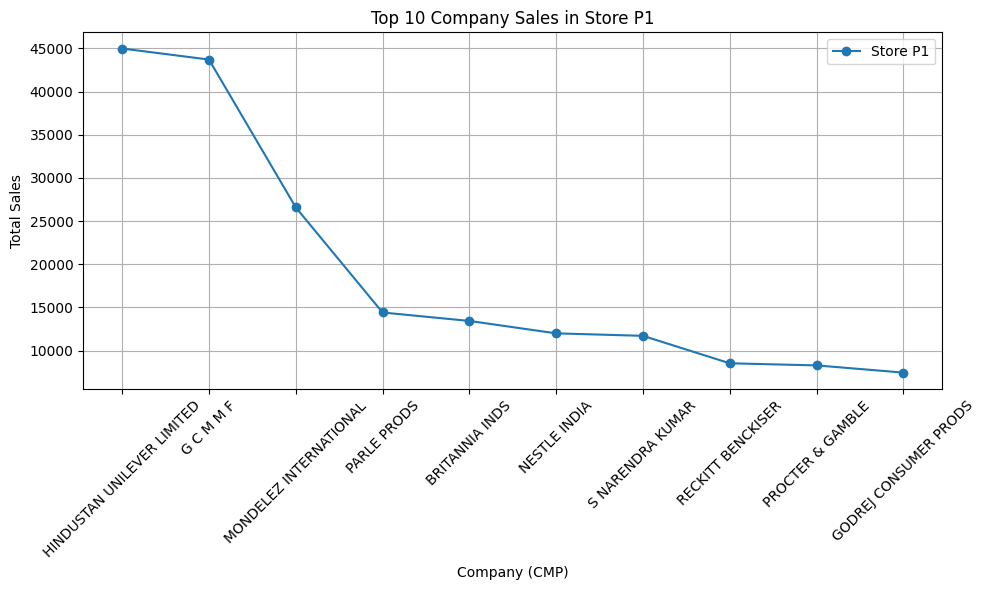

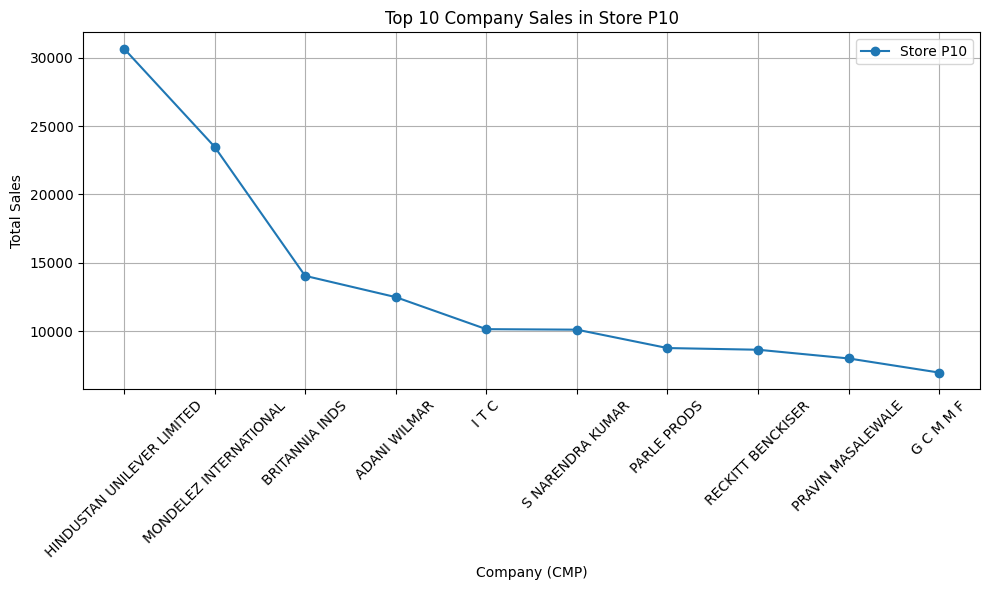

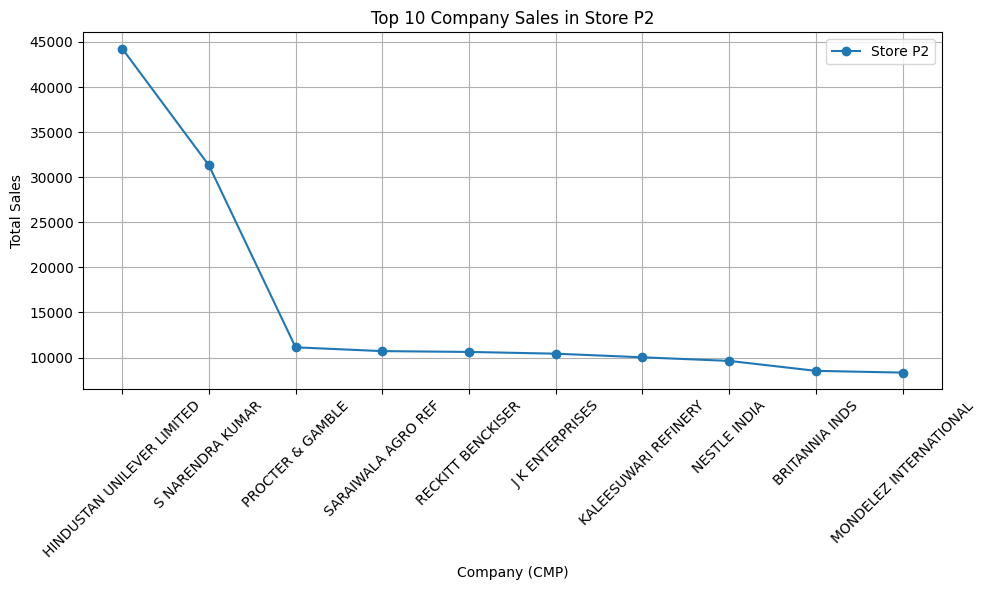

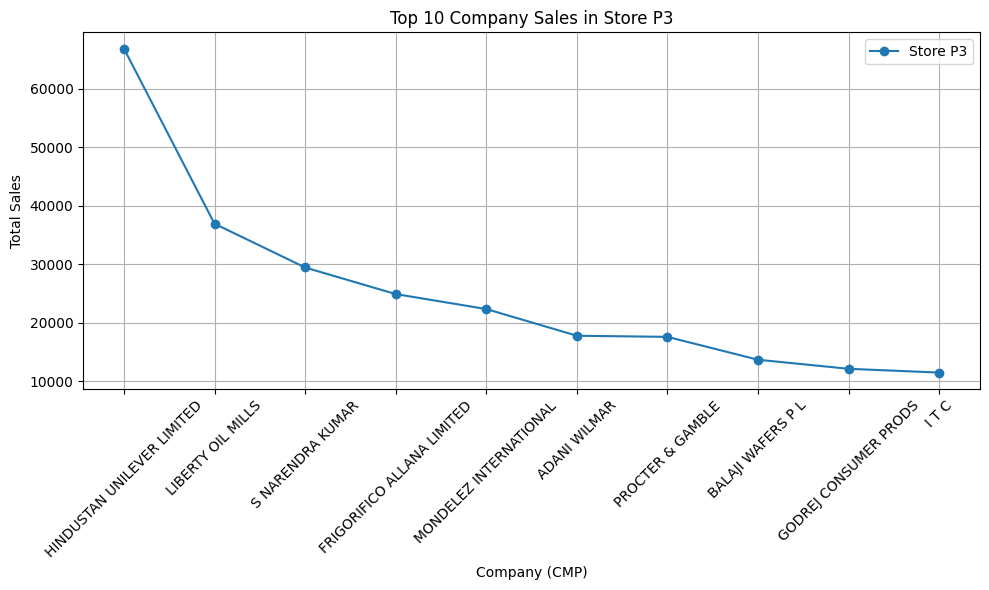

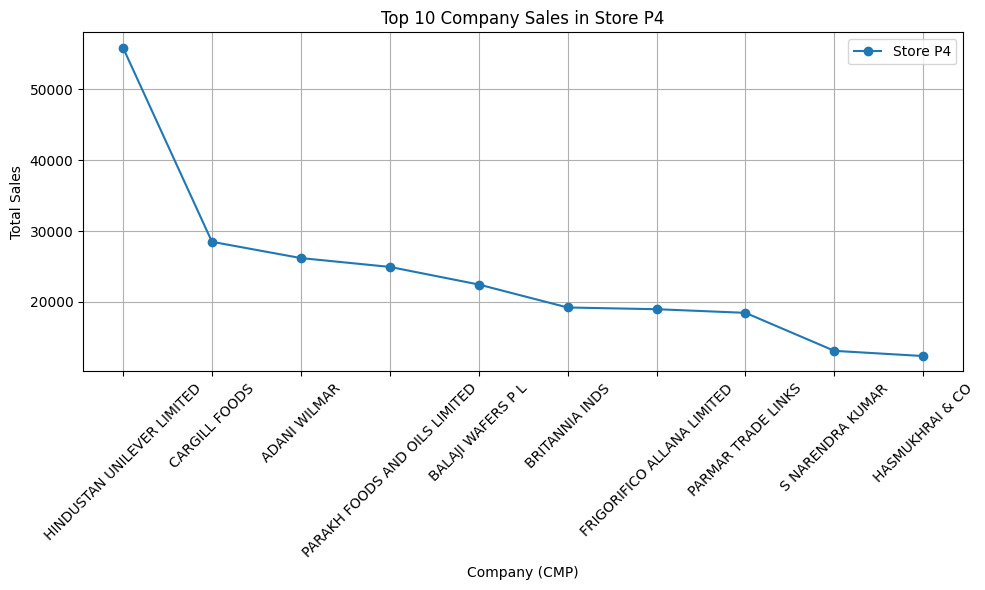

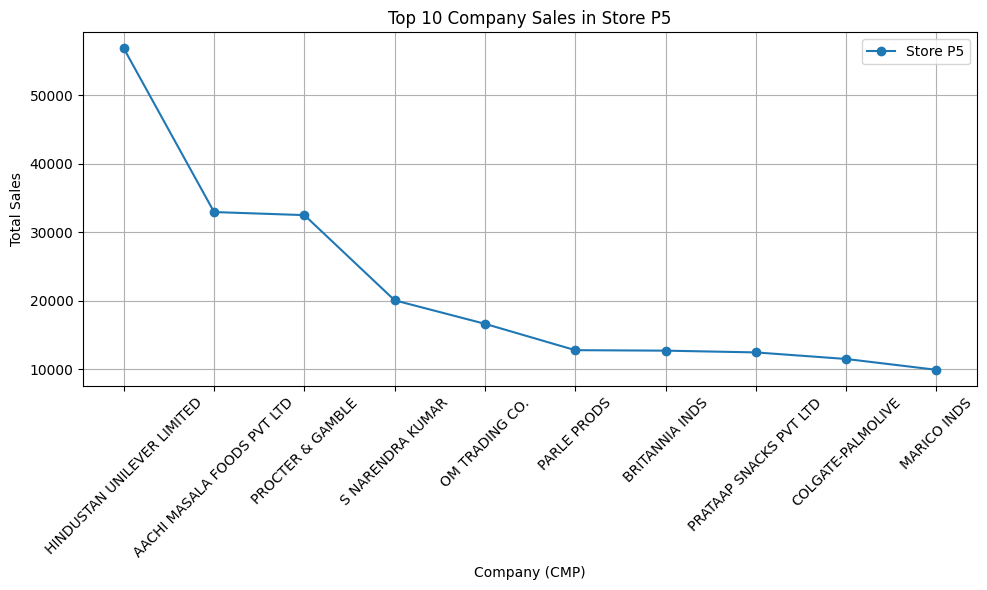

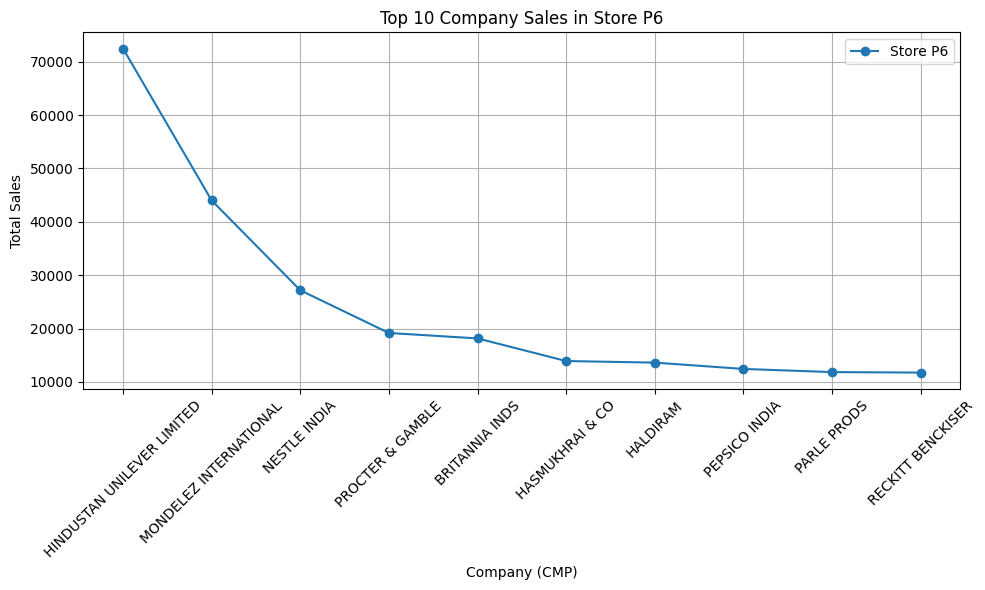

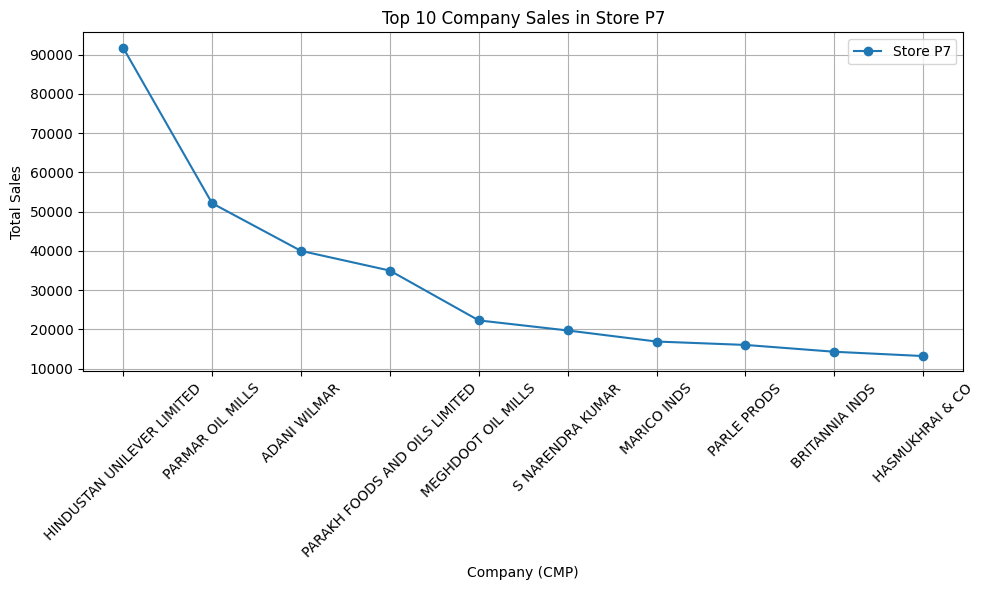

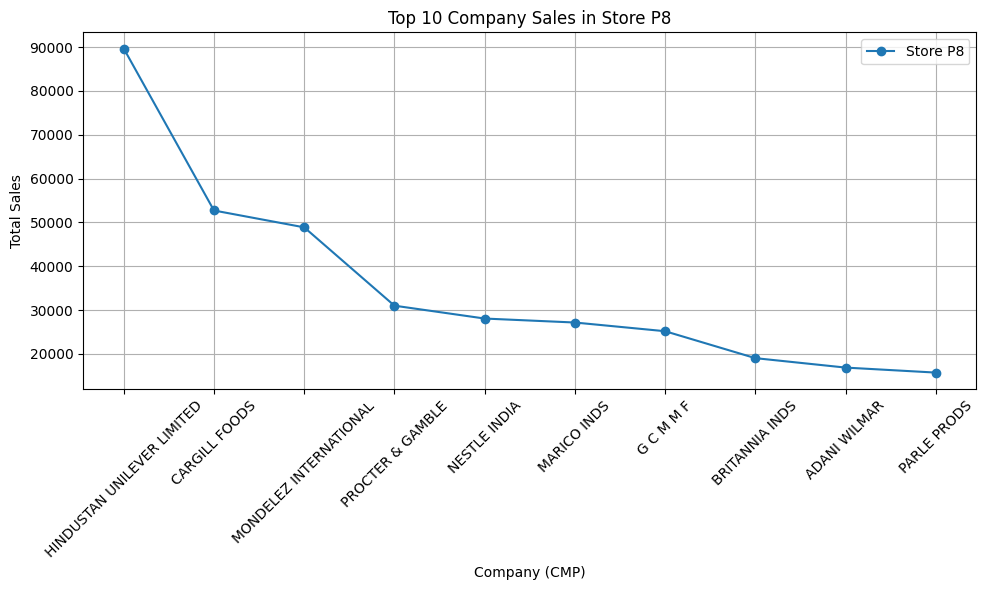

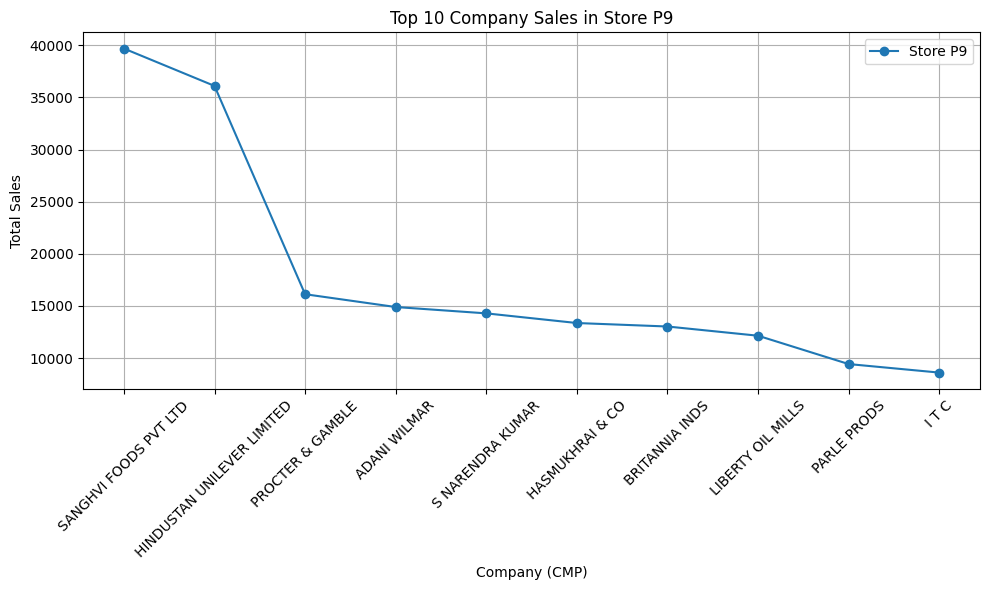

In [ ]:
sales_by_store_and_company = df.groupby(['STORECODE', 'CMP'])['VALUE'].sum().reset_index()
sales_by_store_and_company_sorted = sales_by_store_and_company.sort_values(by=['STORECODE', 'VALUE'], ascending=[True, False])
top_10_sales_by_store = sales_by_store_and_company_sorted.groupby('STORECODE').head(10)
for store_code, data in top_10_sales_by_store.groupby('STORECODE'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['CMP'], data['VALUE'], marker='o', linestyle='-', label=f'Store {store_code}')
    plt.title(f'Top 10 Company Sales in Store {store_code}')
    plt.xlabel('Company (CMP)')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

MOTHLY COMPANY SALES

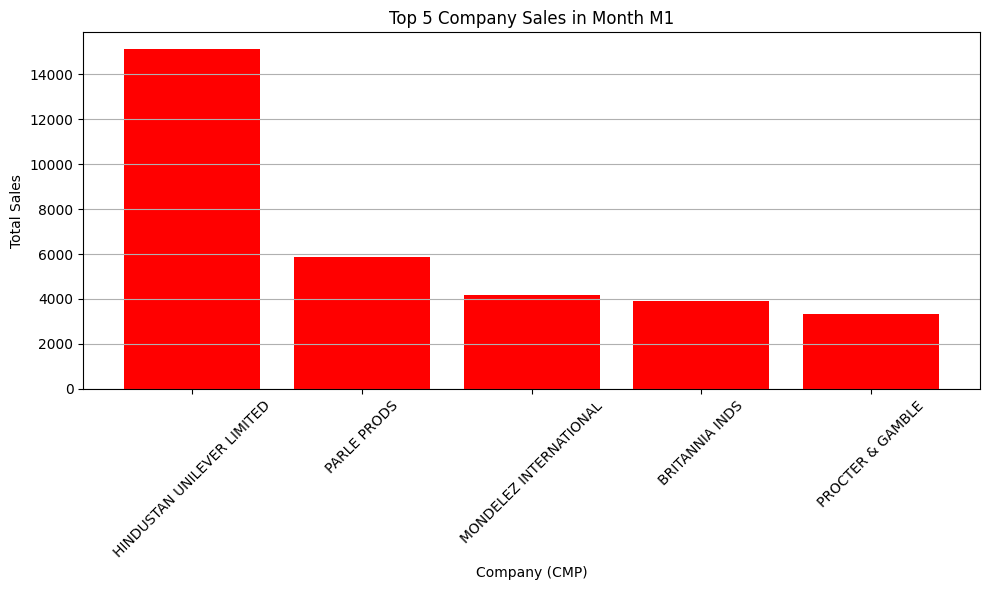

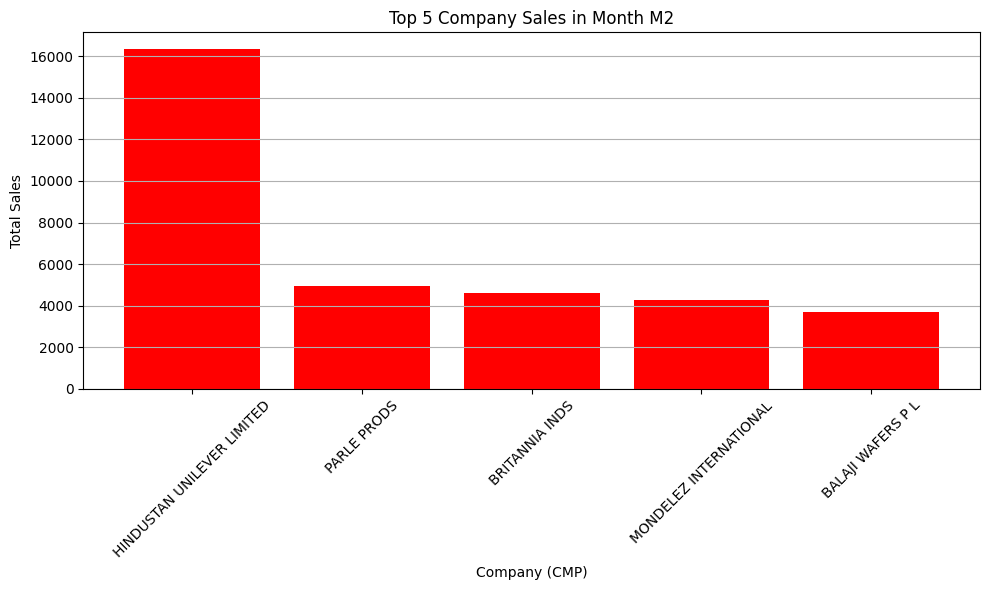

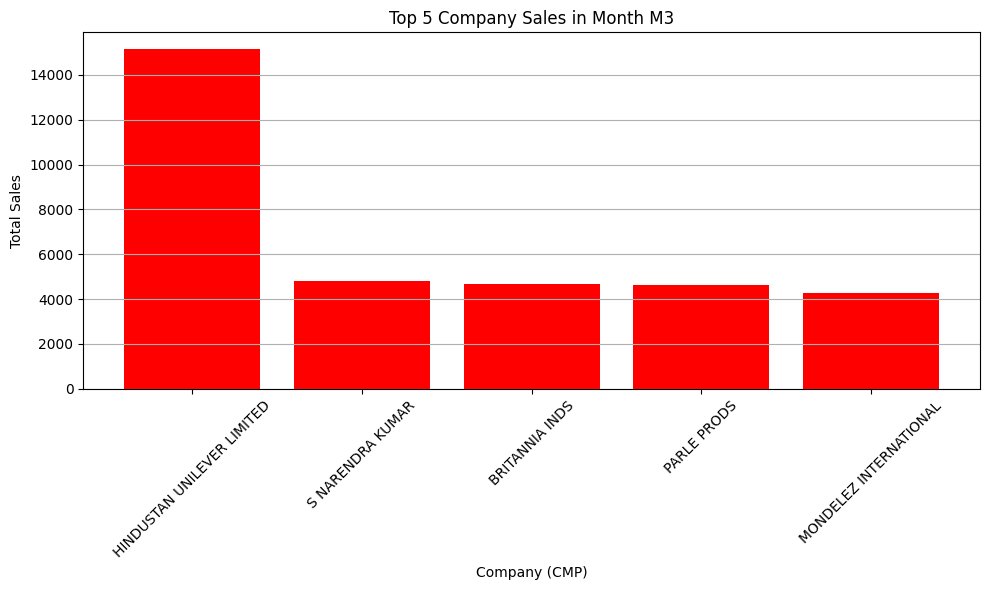

In [ ]:
sales_by_month_and_company = df.groupby(['MONTH', 'CMP'])['QTY'].sum().reset_index()
sales_by_month_and_company_sorted = sales_by_month_and_company.sort_values(by=['MONTH', 'QTY'], ascending=[True, False])
top_5_sales_by_month = sales_by_month_and_company_sorted.groupby('MONTH').head(5)
for month, data in top_5_sales_by_month.groupby('MONTH'):
    plt.figure(figsize=(10, 6))
    plt.bar(data['CMP'], data['QTY'], color='red')
    plt.title(f'Top 5 Company Sales in Month {month}')
    plt.xlabel('Company (CMP)')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

COMPANY SALES BASED ON GRP,SGRP AND SSGRP

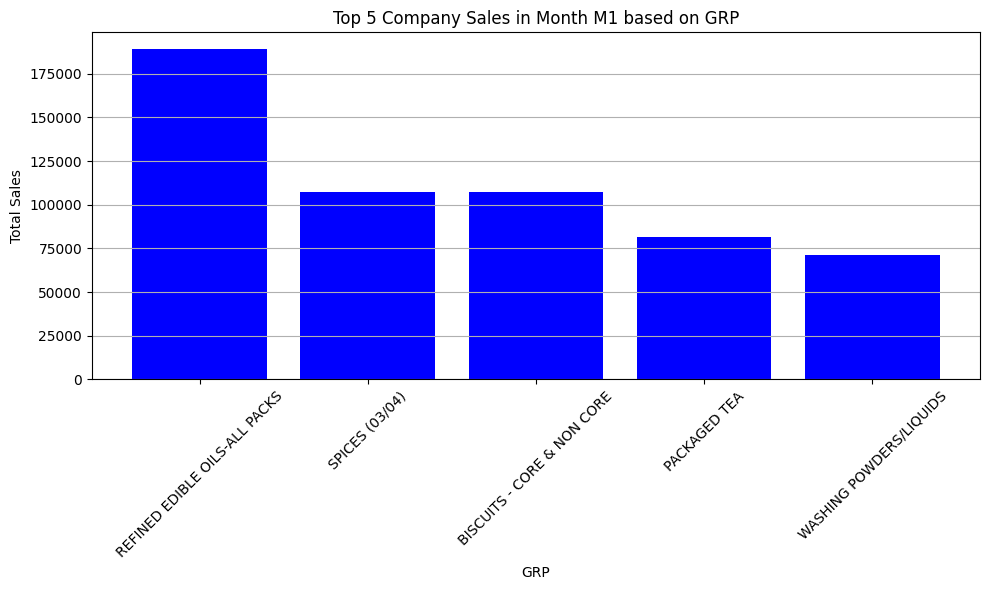

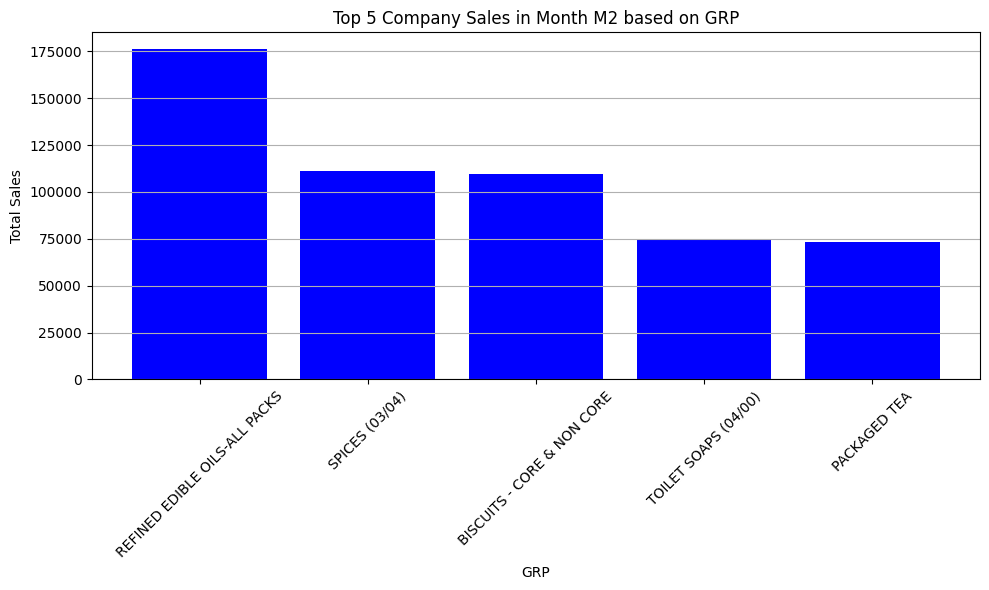

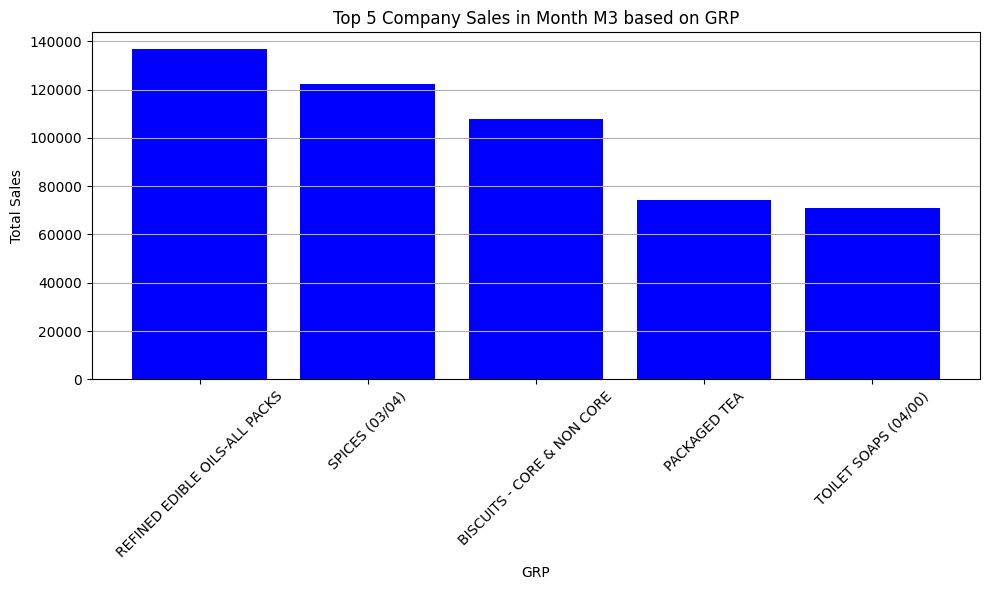

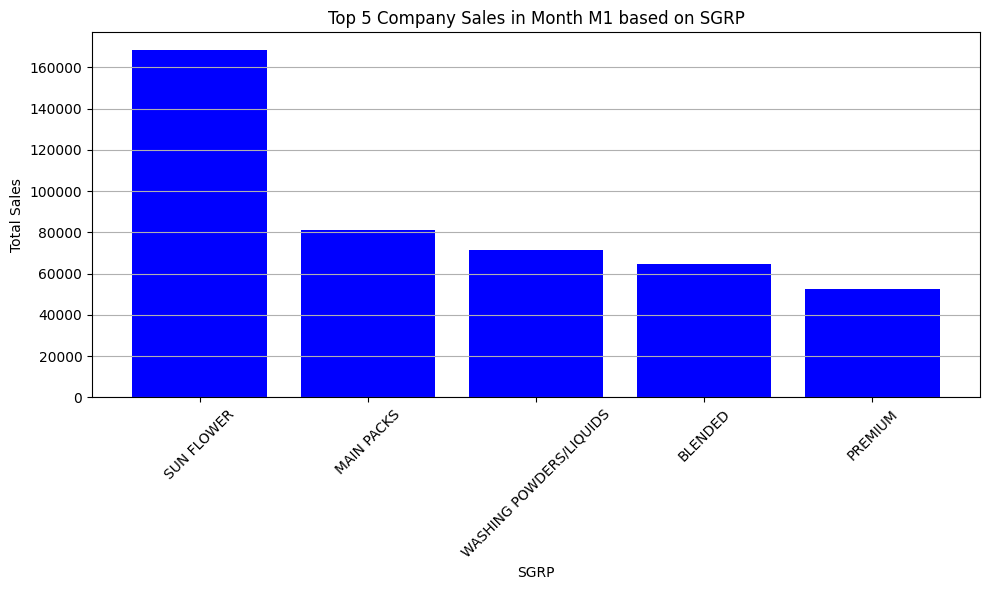

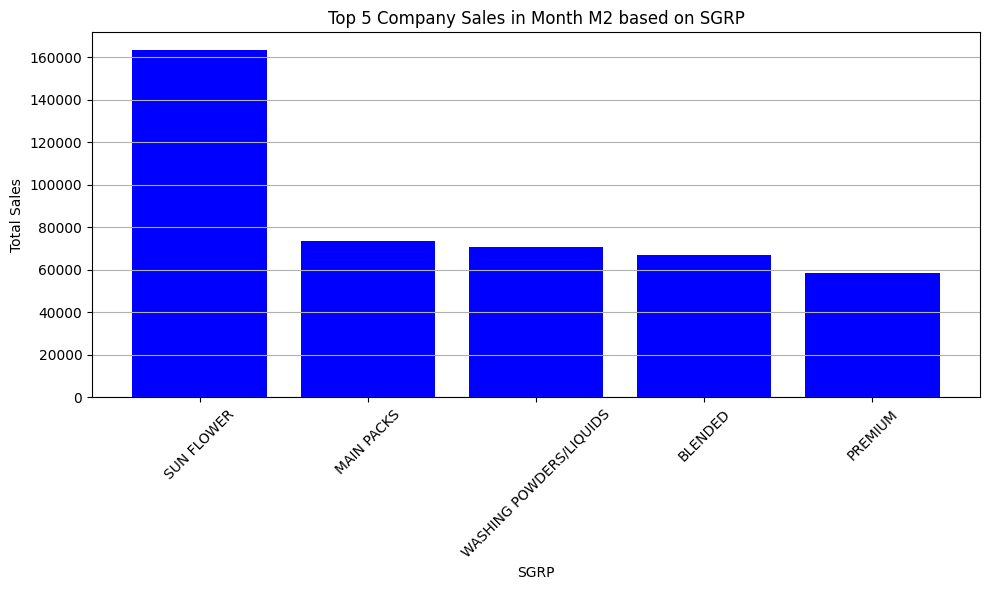

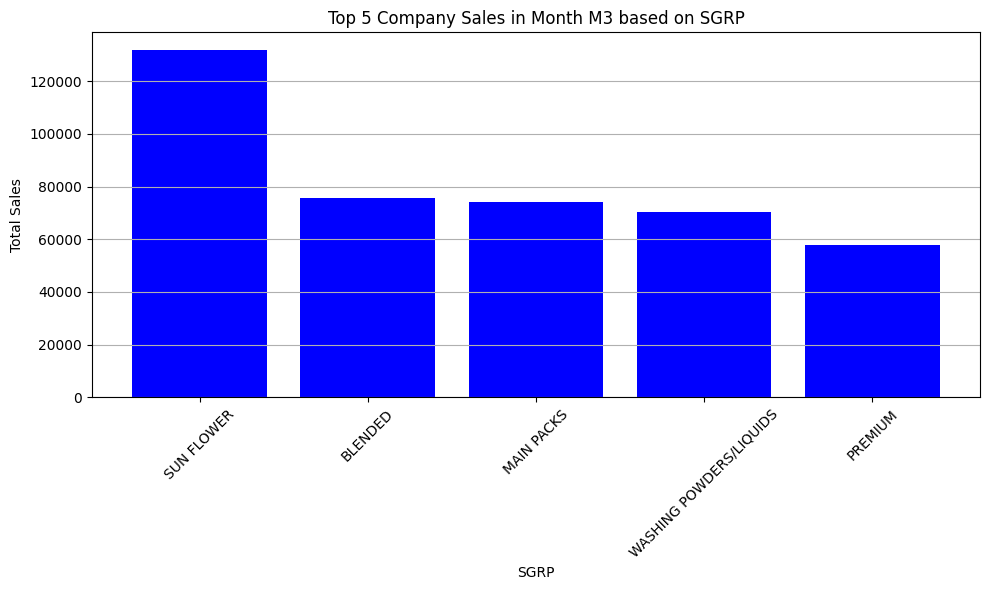

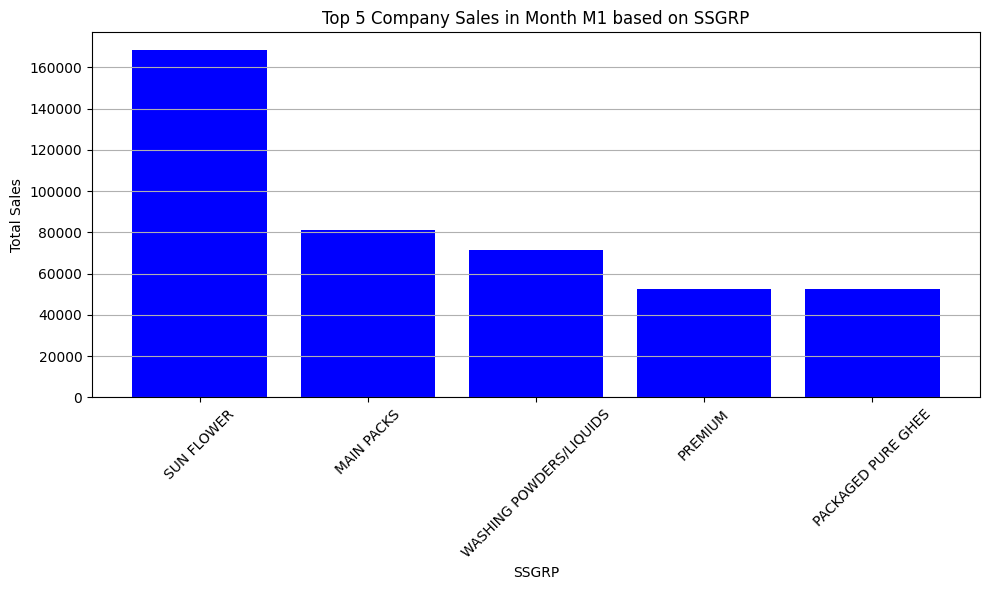

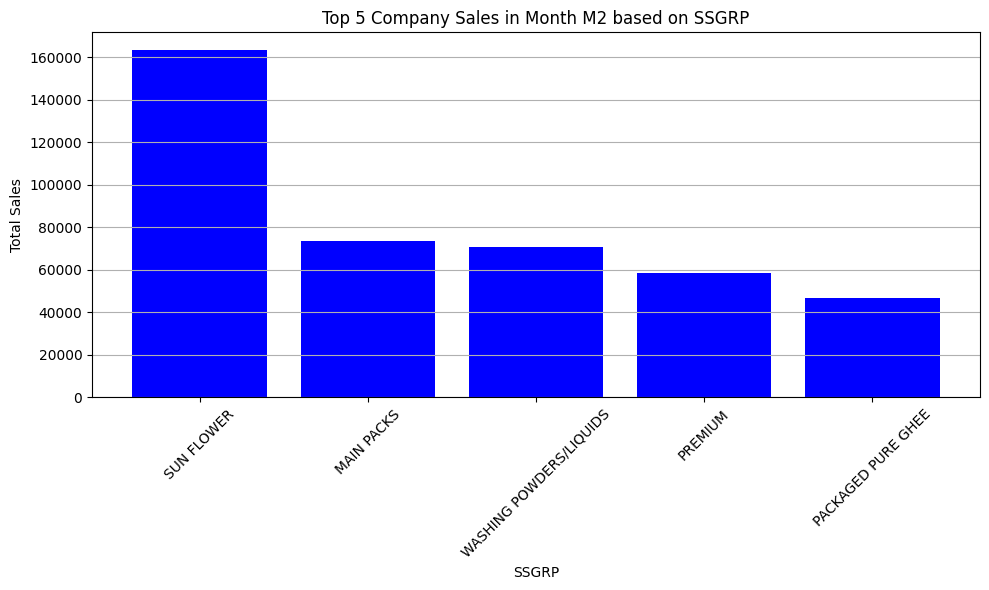

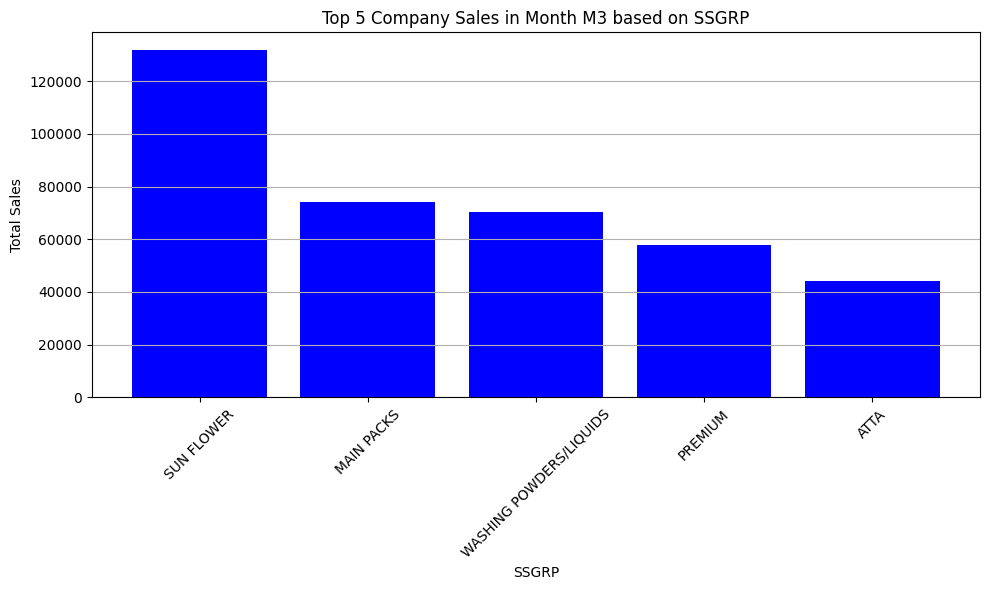

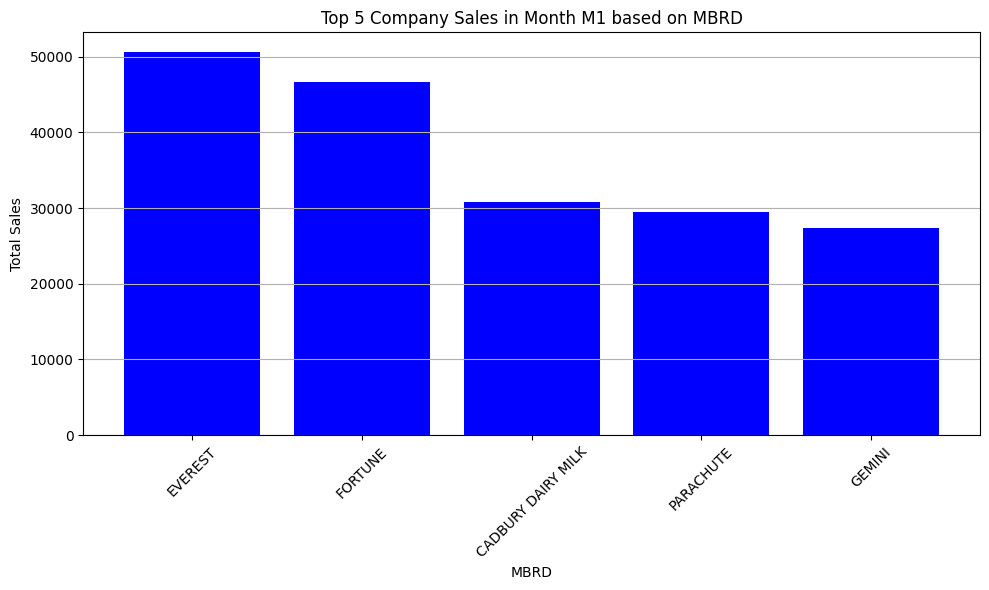

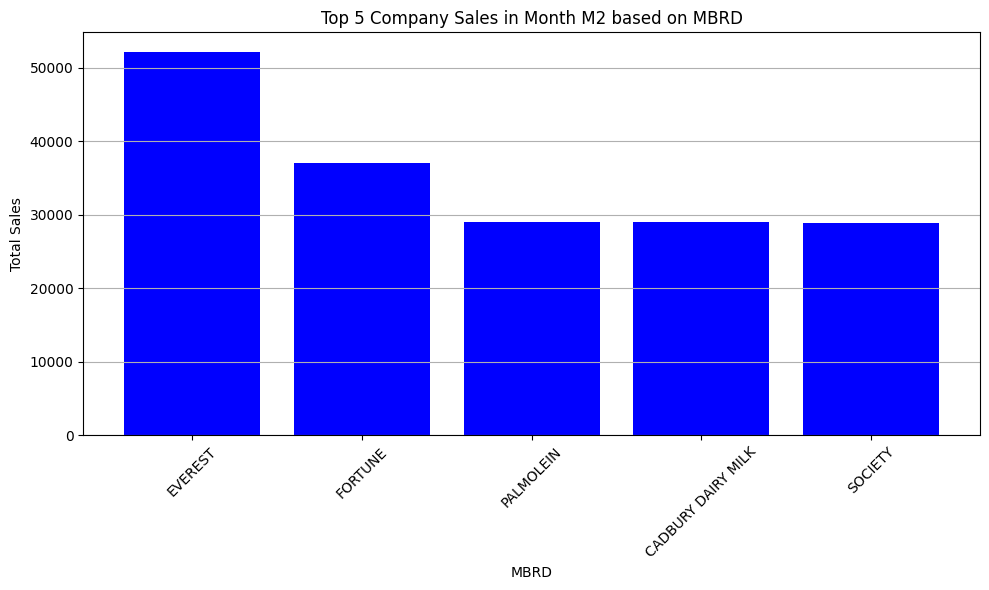

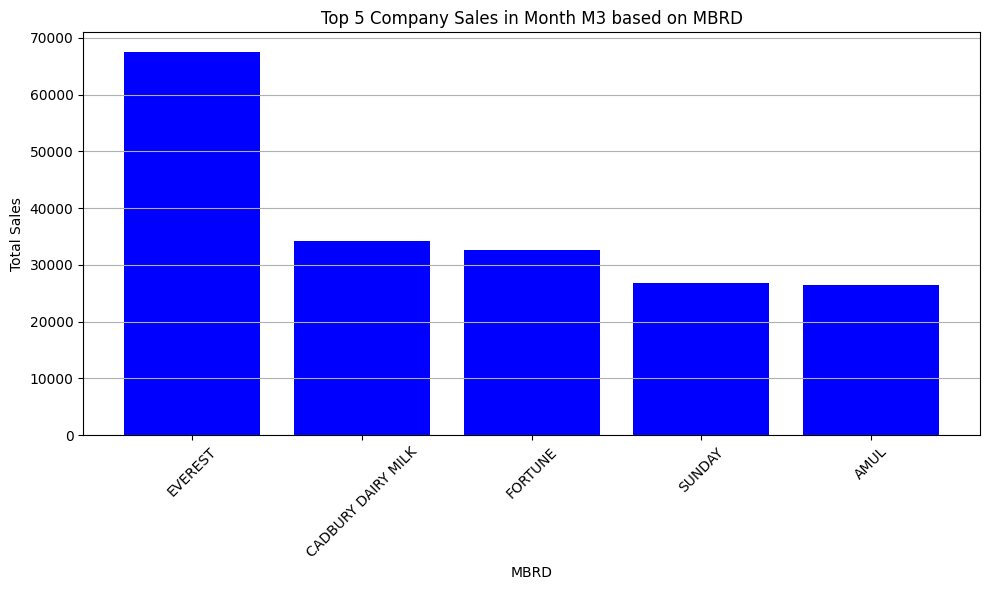

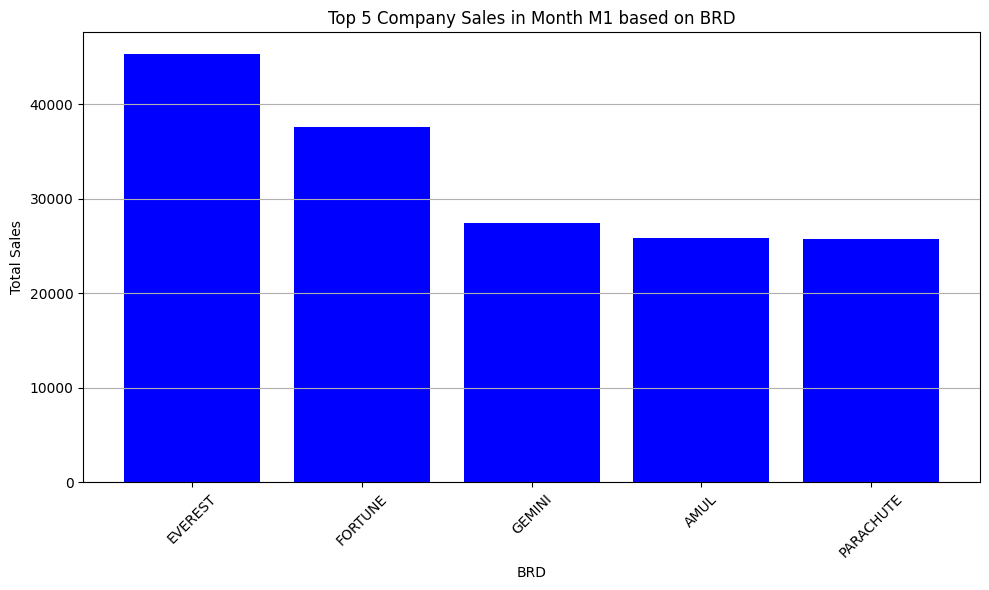

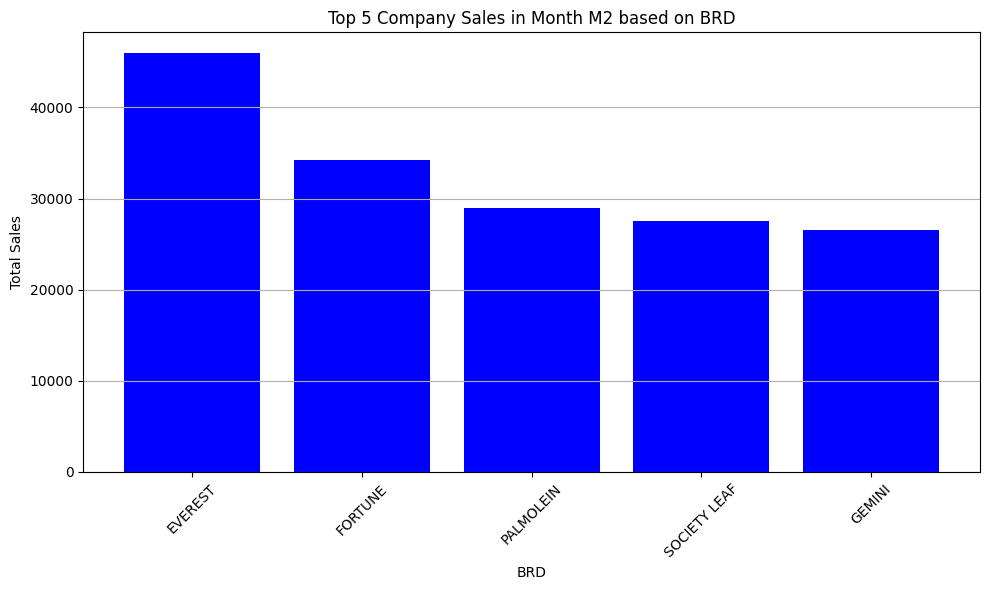

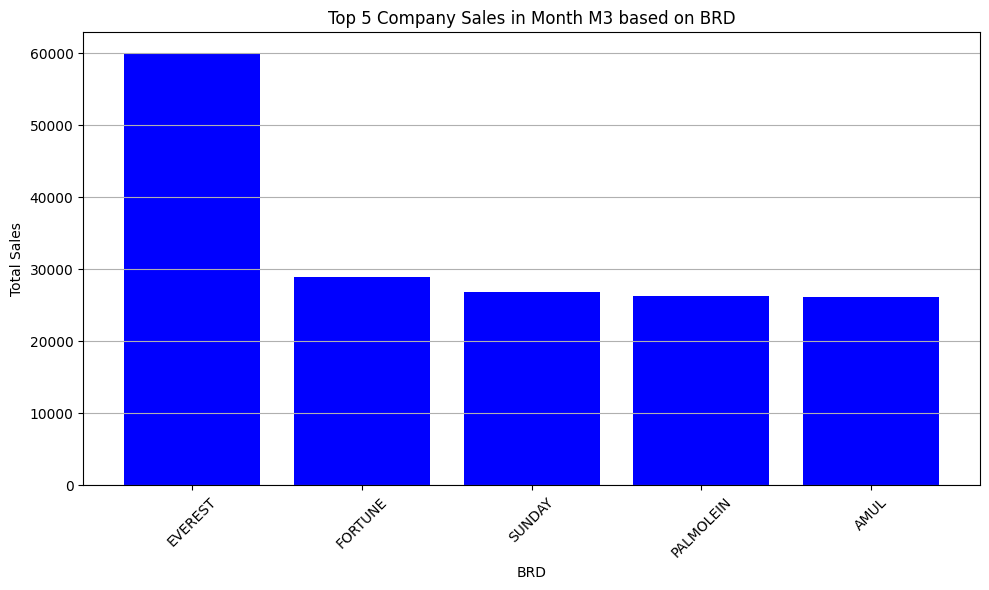

In [ ]:
categories = ['GRP', 'SGRP', 'SSGRP', 'MBRD', 'BRD']
for category in categories:
    sales_by_month_and_category = df.groupby(['MONTH', category])['VALUE'].sum().reset_index()
    sales_by_month_and_category_sorted = sales_by_month_and_category.sort_values(by=['MONTH', 'VALUE'], ascending=[True, False])
    top_5_sales_by_category = sales_by_month_and_category_sorted.groupby('MONTH').head(5)
    for month, data in top_5_sales_by_category.groupby('MONTH'):
        plt.figure(figsize=(10, 6))
        plt.bar(data[category], data['VALUE'], color='blue')
        plt.title(f'Top 5 Company Sales in Month {month} based on {category}')
        plt.xlabel(f'{category}')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

CUSTOMER SEGMENTATION

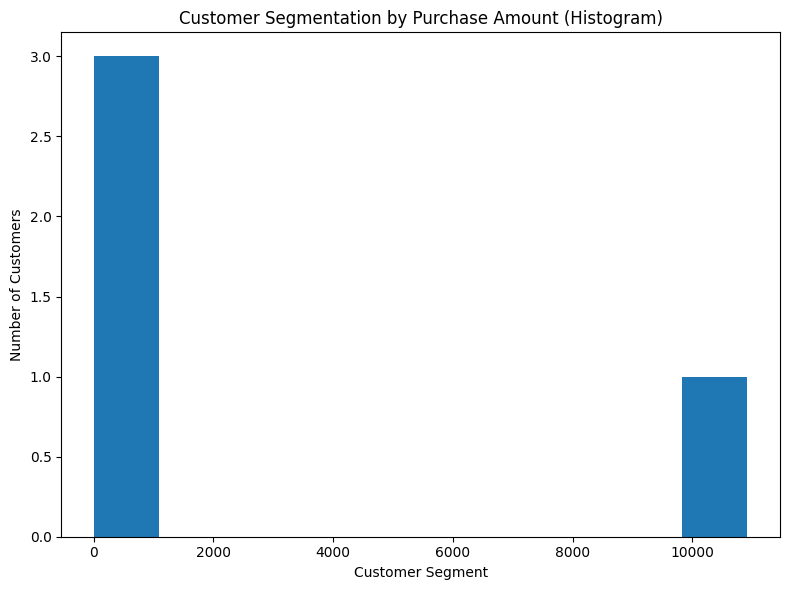

In [ ]:
bins = np.linspace(df['QTY'].min(), df['QTY'].max(), 5)
bin_labels = ['Low Spenders', 'Medium Spenders', 'High Spenders', 'Very High Spenders']
customer_segments = pd.cut(df['QTY'], bins=bins, labels=bin_labels)
customer_segment_counts = customer_segments.value_counts()
plt.figure(figsize=(8, 6))
customer_segment_counts.plot(kind='hist')
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation by Purchase Amount (Histogram)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()